# Box Office by Month

* How do Box Office results vary based on month of release?

In [1]:
#Import dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import datetime as dt

In [2]:
#Read clean data
path = "Movie_Data.csv"
movies = pd.read_csv(path)
movies.head()

,IMDb ID,Title,Runtime (mins),Year,Genres,Release Date,IMDb Rating,Metascore,Rating,Box Office
0,tt1872181,The Amazing Spider-Man 2,142,2014,"Action, Adventure, Sci-Fi",4/10/2014,6.6,53,PG-13,183277573
1,tt1323594,Despicable Me,95,2010,"Animation, Comedy, Family, Fantasy",6/20/2010,7.7,72,PG,251476985
2,tt1375670,Grown Ups,102,2010,Comedy,6/24/2010,6.0,30,PG-13,162001186
3,tt0892769,How to Train Your Dragon,98,2010,"Animation, Action, Adventure, Family, Fantasy",3/18/2010,8.1,74,PG,216900000
4,tt1375666,Inception,148,2010,"Action, Adventure, Sci-Fi, Thriller",7/8/2010,8.8,74,PG-13,292568851


In [3]:
#Extract relevant columns
release = movies[['Title','Release Date','Box Office']]
release.head()

,Title,Release Date,Box Office
0,The Amazing Spider-Man 2,4/10/2014,183277573
1,Despicable Me,6/20/2010,251476985
2,Grown Ups,6/24/2010,162001186
3,How to Train Your Dragon,3/18/2010,216900000
4,Inception,7/8/2010,292568851


In [4]:
# Convert release date to datetime
release['Release Date'] =  pd.to_datetime(release['Release Date'])
release.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Title,Release Date,Box Office
0,The Amazing Spider-Man 2,2014-04-10,183277573
1,Despicable Me,2010-06-20,251476985
2,Grown Ups,2010-06-24,162001186
3,How to Train Your Dragon,2010-03-18,216900000
4,Inception,2010-07-08,292568851


In [5]:
# Add column for month of release
months = []
for date in release['Release Date']:
    months.append(date.month)
release['Release Month'] = months
release.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Title,Release Date,Box Office,Release Month
0,The Amazing Spider-Man 2,2014-04-10,183277573,4
1,Despicable Me,2010-06-20,251476985,6
2,Grown Ups,2010-06-24,162001186,6
3,How to Train Your Dragon,2010-03-18,216900000,3
4,Inception,2010-07-08,292568851,7


In [6]:
# Average Box Office per month
Jan = release['Box Office'][release['Release Month'] == 1].mean()
Feb = release['Box Office'][release['Release Month'] == 2].mean()
Mar = release['Box Office'][release['Release Month'] == 3].mean()
Apr = release['Box Office'][release['Release Month'] == 4].mean()
May = release['Box Office'][release['Release Month'] == 5].mean()
Jun = release['Box Office'][release['Release Month'] == 6].mean()
Jul = release['Box Office'][release['Release Month'] == 7].mean()
Aug = release['Box Office'][release['Release Month'] == 8].mean()
Sept = release['Box Office'][release['Release Month'] == 9].mean()
Oct = release['Box Office'][release['Release Month'] == 10].mean()
Nov = release['Box Office'][release['Release Month'] == 11].mean()
Dec = release['Box Office'][release['Release Month'] == 12].mean()


In [7]:
# df for x and y
release_df = pd.DataFrame({"Month":['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'],
                          "Average Box Office (millions)":[Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec]})
release_df['Average Box Office (millions)'] = release_df['Average Box Office (millions)']/1000000
release_df

,Month,Average Box Office (millions)
0,Jan,21.135935
1,Feb,63.600268
2,Mar,54.834767
3,Apr,74.316960
4,May,60.912100
5,Jun,111.011569
6,Jul,93.221184
7,Aug,44.072004
8,Sept,23.217586
9,Oct,65.371941


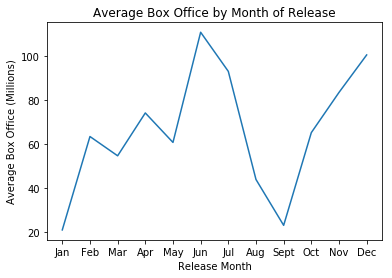

In [8]:
# line plot to show box office relation to months
plt.plot(release_df['Month'],release_df['Average Box Office (millions)'])
plt.xlabel("Release Month")
plt.ylabel("Average Box Office (Millions)")
plt.title("Average Box Office by Month of Release")
plt.show()

In [9]:
# sort data
sorted(release_df['Average Box Office (millions)'])

[21.13593489090909,
 23.21758648275862,
 44.07200432876712,
 54.8347668988764,
 60.91210045263158,
 63.600267527777774,
 65.37194132307692,
 74.31696047222222,
 83.64215410638297,
 93.22118404444444,
 100.6944484074074,
 111.01156942424242]

In [10]:
sorted_release = pd.DataFrame({'Month':['Jan', 'Sept', 'Aug', 'Mar', 'May', 'Feb', 'Oct', 'Apr', 'Nov', 'Jul', 'Dec', 'Jun'],
                               'Average Box Office (millions)':sorted(release_df['Average Box Office (millions)'])
                              })
sorted_release

,Month,Average Box Office (millions)
0,Jan,21.135935
1,Sept,23.217586
2,Aug,44.072004
3,Mar,54.834767
4,May,60.912100
5,Feb,63.600268
6,Oct,65.371941
7,Apr,74.316960
8,Nov,83.642154
9,Jul,93.221184


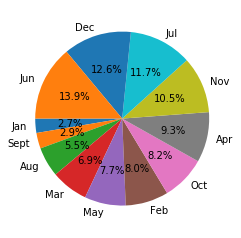

In [11]:
# pie chart percentage per month
plt.pie(sorted_release['Average Box Office (millions)'],labels=sorted_release['Month'],autopct="%1.1f%%",startangle=180)
plt.show()

In [12]:
# pie chart percentage per quarter
q1 = release_df['Average Box Office (millions)'][0:2].sum()
q2 = release_df['Average Box Office (millions)'][3:5].sum()
q3 = release_df['Average Box Office (millions)'][6:8].sum()
q4 = release_df['Average Box Office (millions)'][9:11].sum()
labels = ['Q1','Q2','Q3','Q4']
size = [q1, q2, q3, q4]

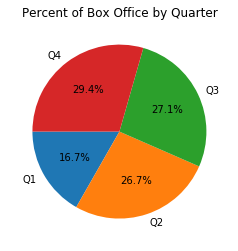

In [13]:
plt.pie(size,labels=labels,autopct="%1.1f%%",startangle=180)
plt.title("Percent of Box Office by Quarter")
plt.show()

In [48]:
summer = release_df['Average Box Office (millions)'][5:7].sum()
fall = release_df['Average Box Office (millions)'][8:10].sum()
winter = release_df['Average Box Office (millions)'][0:1].sum()
winter = winter + release_df['Average Box Office (millions)'][11].sum()
spring = release_df['Average Box Office (millions)'][2:4].sum()
labels = ['Summer','Fall','Winter','Spring']
size = [summer, fall, winter, spring]

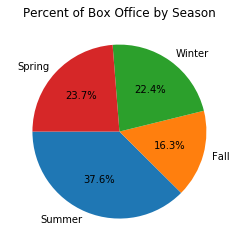

In [49]:
plt.pie(size,labels=labels,autopct="%1.1f%%",startangle=180)
plt.title("Percent of Box Office by Season")
plt.show()

In [25]:
winter

21.13593489090909

In [14]:
# box plot
box = release[['Box Office','Release Month']]
box['Box Office'] = box['Box Office']/1000000
box.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Box Office,Release Month
0,183.277573,4
1,251.476985,6
2,162.001186,6
3,216.900000,3
4,292.568851,7


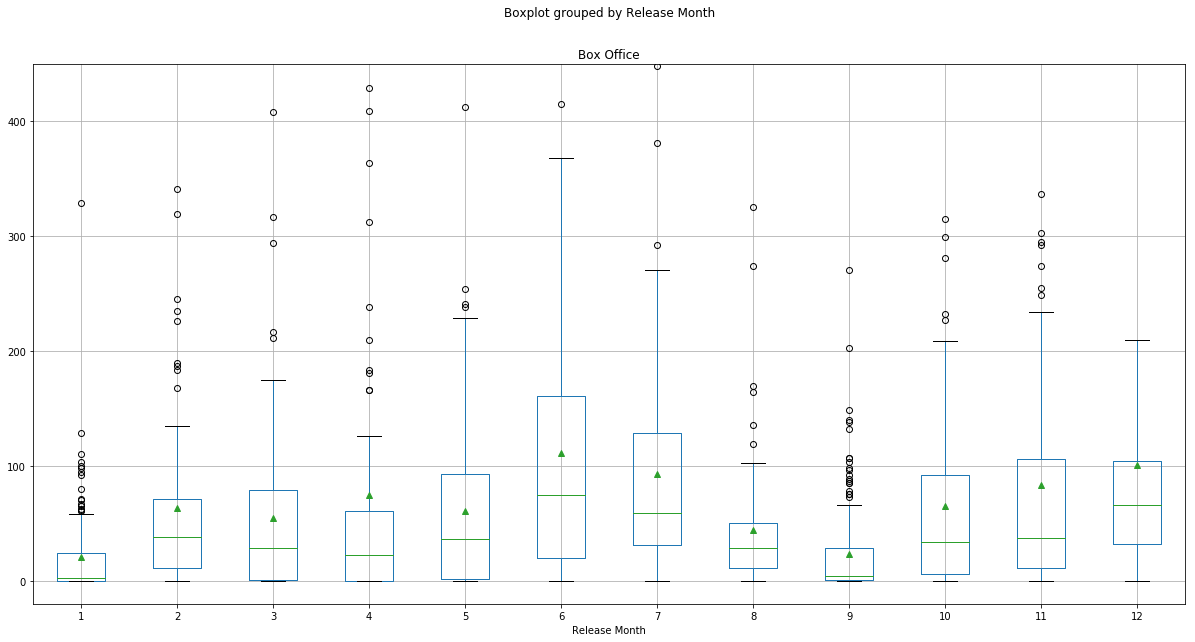

In [15]:
box.boxplot("Box Office", by="Release Month", figsize=(20, 10),showmeans=True)
plt.ylim(-20, 450)
plt.show()

In [16]:
# ANOVA test
Jan = release['Box Office'][release['Release Month'] == 1]
Feb = release['Box Office'][release['Release Month'] == 2]
Mar = release['Box Office'][release['Release Month'] == 3]
Apr = release['Box Office'][release['Release Month'] == 4]
May = release['Box Office'][release['Release Month'] == 5]
Jun = release['Box Office'][release['Release Month'] == 6]
Jul = release['Box Office'][release['Release Month'] == 7]
Aug = release['Box Office'][release['Release Month'] == 8]
Sept = release['Box Office'][release['Release Month'] == 9]
Oct = release['Box Office'][release['Release Month'] == 10]
Nov = release['Box Office'][release['Release Month'] == 11]
Dec = release['Box Office'][release['Release Month'] == 12]


In [17]:
stats.f_oneway(Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec)

F_onewayResult(statistic=10.874730742925472, pvalue=3.6178800066850965e-19)

# Observation

* Box Office earnings peak in the Summer as well as the holiday season. 

* 48.7% of Box Office earnings are from 4 months (June, July, November, December) in these peak times.

* Box Office earnings dip in the few months after each of these peak seasons, like in January and September.

* Quarter 1 is the slowest, only representing 16.7% of yearly Box Office earnings.

* The other quarters have their own slow months as well, but the peak months within them keep their earning up.

* After doing an ANOVA test, the pvalue is less than 0.05 so, this test is significant.